In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# IMPORT DATASET

In [2]:
loan=pd.read_csv("loan.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# DATA ANALYSIS

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null float64
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 62.4+ KB


In [4]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

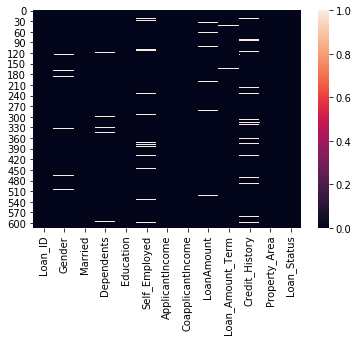

In [7]:
sns.heatmap(data.isnull())

# FILLING MISSING VALUES

In [8]:
col=["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents","LoanAmount","Loan_Amount_Term","Credit_History"]
data[col]=data[col].fillna(data.mode().iloc[0])

In [11]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# USING LABEL ENCODER FOR TRANSFORMING THE DATA

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Loan_ID"]=le.fit_transform(data["Loan_ID"])

In [13]:
data["Gender"]=le.fit_transform(data["Gender"])
data["Married"]=le.fit_transform(data["Married"])
data["Education"]=le.fit_transform(data["Education"])
data["Self_Employed"]=le.fit_transform(data["Self_Employed"])
data["Property_Area"]=le.fit_transform(data["Property_Area"])
data["Loan_Status"]=le.fit_transform(data["Loan_Status"])

In [14]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
data.rename(columns={'Loan_ID':'Loanid', 'Gender':'Gender', 'Married':'married', 'Dependents':'dependents', 'Education':'eductaion',
       'Self_Employed':'selfemployed', 'ApplicantIncome':'applicantincome', 'CoapplicantIncome':'coapplicatincome', 'LoanAmount':'loanamount',
       'Loan_Amount_Term':'loanamountterm', 'Credit_History':'credithistory', 'Property_Area':'propertyarea', 'Loan_Status':'loanstatus'},inplace=True)

In [16]:
data.head()

,Loanid,Gender,married,dependents,eductaion,selfemployed,applicantincome,coapplicatincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus
0,0,1,0,0.0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [17]:
data.corr()

,Loanid,Gender,married,dependents,eductaion,selfemployed,applicantincome,coapplicatincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus
Loanid,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.037369,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
eductaion,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
selfemployed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
applicantincome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
coapplicatincome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
loanamount,0.037369,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
loanamountterm,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549


In [23]:
#Using MinMaxScaler to shrinks the range or for conversion
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data.astype(float))
data

array([[0.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.00163132, 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00326264, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.99673736, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99836868, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ]])

In [24]:
df=pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


# VISUALIZATION

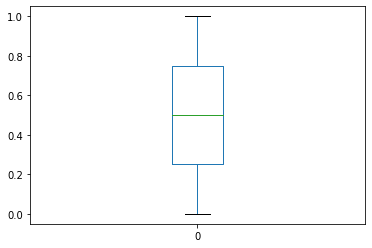

In [43]:
df[0].plot.box()

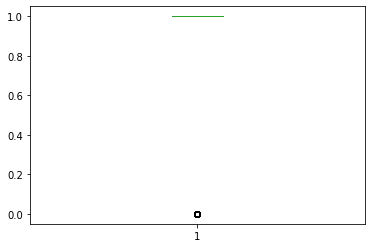

In [27]:
df[1].plot.box()

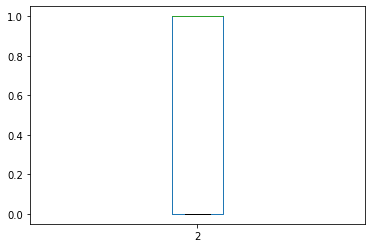

In [29]:
df[2].plot.box()

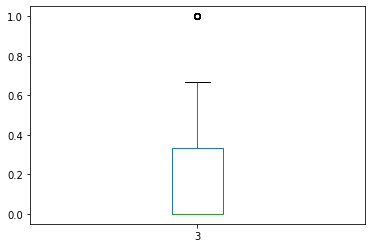

In [30]:
df[3].plot.box()

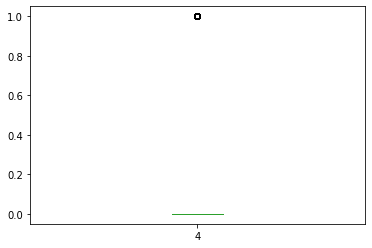

In [31]:
df[4].plot.box()

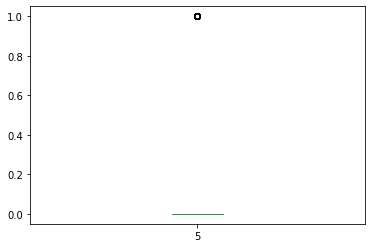

In [33]:
df[5].plot.box()

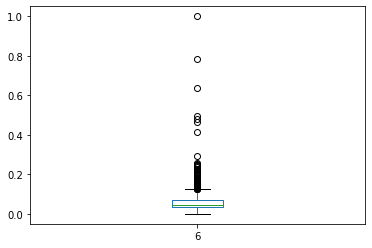

In [34]:
df[6].plot.box()

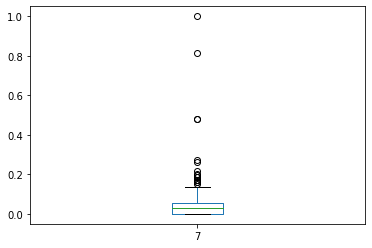

In [37]:
df[7].plot.box()

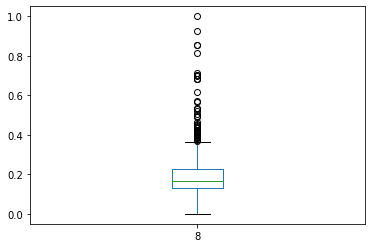

In [72]:
df[8].plot.box()

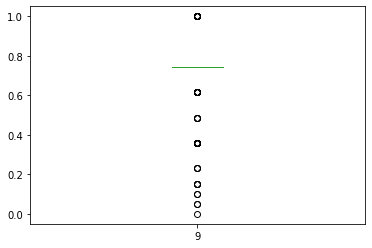

In [73]:
df[9].plot.box()

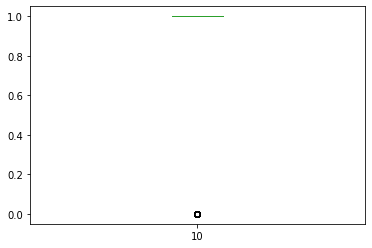

In [74]:
df[10].plot.box()

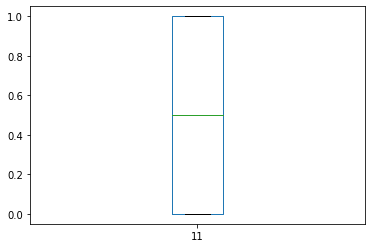

In [75]:
df[11].plot.box()

# DATA CLEANSING OR REMOVING OUTLIERS

In [76]:
from scipy.stats import zscore
import numpy as np

In [77]:
z=np.abs(zscore(data))
z

array([[1.72923217, 0.47234264, 1.37208932, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.31851281,
        1.48253724],
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.72923217, 2.11710719, 1.37208932, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [88]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
       8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
      dtype=int64))


In [91]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [92]:
print(df.shape)
print(df_new.shape)

(614, 13)
(577, 13)


# SPLITTING DATA INTO X AND Y

In [93]:
x=df_new.drop(12,axis=1)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0


In [94]:
y=df_new[12]
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: 12, dtype: float64

# APPLYING ALGORITHM AND MODEL

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=12)

In [132]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 12)
(122, 12)
(455,)
(122,)


In [133]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.9016393442622951
[[18 11]
 [ 1 92]]
              precision    recall  f1-score   support

         0.0       0.95      0.62      0.75        29
         1.0       0.89      0.99      0.94        93

    accuracy                           0.90       122
   macro avg       0.92      0.80      0.84       122
weighted avg       0.91      0.90      0.89       122



In [135]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.7622950819672131
[[ 0 29]
 [ 0 93]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.76      1.00      0.87        93

    accuracy                           0.76       122
   macro avg       0.38      0.50      0.43       122
weighted avg       0.58      0.76      0.66       122



In [139]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9016393442622951
[[18 11]
 [ 1 92]]
              precision    recall  f1-score   support

         0.0       0.95      0.62      0.75        29
         1.0       0.89      0.99      0.94        93

    accuracy                           0.90       122
   macro avg       0.92      0.80      0.84       122
weighted avg       0.91      0.90      0.89       122



In [142]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7049180327868853
[[18 11]
 [25 68]]
              precision    recall  f1-score   support

         0.0       0.42      0.62      0.50        29
         1.0       0.86      0.73      0.79        93

    accuracy                           0.70       122
   macro avg       0.64      0.68      0.65       122
weighted avg       0.76      0.70      0.72       122



In [179]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8278688524590164
[[18 11]
 [10 83]]
              precision    recall  f1-score   support

         0.0       0.64      0.62      0.63        29
         1.0       0.88      0.89      0.89        93

    accuracy                           0.83       122
   macro avg       0.76      0.76      0.76       122
weighted avg       0.83      0.83      0.83       122



In [164]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.860655737704918
[[20  9]
 [ 8 85]]
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        29
         1.0       0.90      0.91      0.91        93

    accuracy                           0.86       122
   macro avg       0.81      0.80      0.81       122
weighted avg       0.86      0.86      0.86       122



In [180]:
#ROC CURVE
from sklearn.metrics import roc_curve

In [182]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.8272278 , 0.79002781, 0.79090588, 0.16440195, 0.66136652,
       0.787901  , 0.81693884, 0.80702813, 0.72028172, 0.79872018,
       0.81993276, 0.78556592, 0.87943773, 0.78829424, 0.70440211,
       0.76169736, 0.70072762, 0.67984794, 0.69322512, 0.75324462,
       0.80152799, 0.82480624, 0.16015484, 0.82497448, 0.77816577,
       0.60193038, 0.85031388, 0.76837782, 0.75455632, 0.71234725,
       0.69670221, 0.82295504, 0.76846156, 0.78635349, 0.69330898,
       0.15299002, 0.74738228, 0.80184052, 0.76259796, 0.79136942,
       0.78418694, 0.8349042 , 0.72875355, 0.79746385, 0.76854545,
       0.81624236, 0.75476139, 0.19562023, 0.8251304 , 0.12770307,
       0.79661269, 0.82596002, 0.78247015, 0.81979782, 0.12663701,
       0.83720051, 0.66556647, 0.76282989, 0.83862503, 0.74908122,
       0.80869873, 0.70296411, 0.80120614, 0.82044691, 0.72548762,
       0.70007222, 0.8040397 , 0.79416971, 0.15243426, 0.20614852,
       0.77016588, 0.80184104, 0.19000958, 0.85089297, 0.75384

In [184]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.03448276 0.03448276 0.06896552
 0.06896552 0.10344828 0.10344828 0.13793103 0.13793103 0.17241379
 0.17241379 0.20689655 0.20689655 0.24137931 0.24137931 0.27586207
 0.27586207 0.34482759 0.34482759 0.37931034 0.37931034 1.        ]
[0.         0.01075269 0.03225806 0.03225806 0.04301075 0.04301075
 0.08602151 0.08602151 0.27956989 0.27956989 0.43010753 0.43010753
 0.53763441 0.53763441 0.76344086 0.76344086 0.83870968 0.83870968
 0.90322581 0.90322581 0.98924731 0.98924731 1.         1.        ]
[1.87943773 0.87943773 0.85089297 0.85031388 0.83862503 0.83720051
 0.8272278  0.82719657 0.80869873 0.80702813 0.79177616 0.79136942
 0.78427346 0.78418694 0.73090739 0.72875355 0.71234725 0.70531863
 0.69734647 0.69330898 0.64816643 0.60193038 0.23541152 0.07104021]


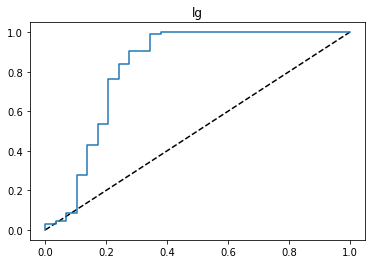

In [185]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="lg")
plt.title("lg")
plt.show()

In [187]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.8049684835001854


In [ ]:
#save the model
from sklearn.externals import joblib
joblib.dump(sv,"loan.pkl")